In [130]:
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [131]:
path_deg = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/res_deg.csv'
path_mir = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/all_results.csv'
path_mir_res = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/all_results_targets.csv'


In [132]:
df_mir = pd.read_csv(path_mir, sep='\t')
total_mir = len(df_mir.index)
print(total_mir)
df_mir[df_mir.MITE.notnull()].head(2)

260


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,22,23,24,seqname,position,start,end,MITE,mirbase,annotation
5,1B:161992200-161992280,sun_all_Cluster_8835,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,...,0,0,2,1B,161992200-161992280,161992200,161992280,"MITE_1712,MITE_233,MITE_1717,MITE_1157",hvu-miR6197,intron
9,1B:565664575-565664794,mrcv_all_Cluster_2513,220,223,1.750,1,0.991,+,CAUUUUCCUAUAGACUUGGUC,142,...,7,0,0,1B,565664575-565664794,565664575,565664794,"MITE_1151,MITE_1572,MITE_1565,MITE_606,MITE_68...",NaN,intron


In [133]:
df_deg = pd.read_csv(path_deg, sep=',')
print(len(df_deg.index))
df_deg.head(2)

15313


,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,MITE,annotation
0,TraesCS1A02G000300.1:66,sun_all_Cluster_118867,TraesCS1A02G000300.1,54,75,66,-43.6,-28.4,0.651376,9.0,"1-2,75-74;5-11,71-65;13-14,63-62;16-22,60-54","3-4,73-72[SIL];12-12,64-64[SIL];15-15,61-61[SIL]",(((((((.((.(((((((..((&))..))))))).)).))))))),GCAGAUCUUGGUGGUAGUAGCA&UGAAGCUGCCAGCAUGAUCUGC,3,0.951576,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,NaN,five_prime_UTR
1,TraesCS1A02G000400.1:1381,sun_all_Cluster_118867,TraesCS1A02G000400.1,1369,1390,1381,-43.6,-28.4,0.651376,9.0,"1-2,1390-1389;5-11,1386-1380;13-14,1378-1377;1...","3-4,1388-1387[SIL];12-12,1379-1379[SIL];15-15,...",(((((((.((.(((((((..((&))..))))))).)).))))))),GCAGAUCUUGGUGGUAGUAGCA&UGAAGCUGCCAGCAUGAUCUGC,3,0.955557,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,NaN,five_prime_UTR


In [158]:
has_target = 0
df_mir['has_target'] = 0
df_deg['has_target'] = 0
has_same_target = 0
for k,v in df_mir.iterrows():
    df_target = df_deg[df_deg.Query == v.Name]
    if len(df_target.index) > 0:
        has_target += 1
        if df_mir.at[k, 'has_target'] == 0:
            df_mir.at[k, 'has_target'] = 1
        if not pd.isna(v.MITE):
            prods = v.MITE.split(',')
            for k2,v2 in df_target.iterrows():
                if not pd.isna(v2.MITE):
                    target = v2.MITE.split(',')
                    prods = set(filter(None, prods))
                    target = set(filter(None, target))
                    inter = target.intersection(prods)
                    if inter:
                        has_same_target += 1
                        print(v2.SiteID, v.Name, inter)
                        df_mir.at[k, 'has_target'] = 2
                        df_deg.at[k2, 'has_target'] = 2

TraesCS2D02G327200.1:2349 sun_all_Cluster_8835 {'MITE_1157'}
TraesCS3B02G102200.1:1506 sun_all_Cluster_8835 {'MITE_1157'}
TraesCS3B02G231700.2:1224 sun_all_Cluster_8835 {'MITE_1157'}
TraesCS5B02G480100.1:1530 sun_all_Cluster_8835 {'MITE_1157'}
TraesCS5D02G261800.1:1451 sun_all_Cluster_8835 {'MITE_1157'}
TraesCS5B02G480100.1:1530 sun_all_Cluster_8835 {'MITE_1157'}
TraesCS2B02G543000.1:1198 sun_all_Cluster_8835 {'MITE_1157'}
TraesCS5B02G480100.1:1530 sun_all_Cluster_8835 {'MITE_1157'}
TraesCS2B02G543000.1:1198 sun_all_Cluster_8835 {'MITE_1157'}
TraesCS2D02G327200.1:2349 sun_all_Cluster_8835 {'MITE_1157'}
TraesCS3D02G205600.1:2705 sun_all_Cluster_8835 {'MITE_1157'}
TraesCS5B02G480100.1:1530 sun_all_Cluster_8835 {'MITE_1157'}
TraesCS5D02G261800.1:1451 sun_all_Cluster_8835 {'MITE_1157'}
TraesCS7B02G133400.1:4694 sun_all_Cluster_8835 {'MITE_1157'}
TraesCSU02G017900.1:2157 sun_all_Cluster_8835 {'MITE_1157'}
TraesCS1A02G143400.1:16320 sun_all_Cluster_28681 {'MITE_798', 'MITE_677', 'MITE_1745',

In [159]:
total_mir

260

In [160]:
has_target

242

In [161]:
has_target * 100 / total_mir

93.07692307692308

In [162]:
has_same_target

40

In [163]:
len(df_mir[df_mir.has_target == 2].index) * 100 / total_mir

1.9230769230769231

In [179]:
df_mir[df_mir.Name=='sun_all_Cluster_8835']

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,23,24,seqname,position,start,end,MITE,mirbase,annotation,has_target
5,1B:161992200-161992280,sun_all_Cluster_8835,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,...,0,2,1B,161992200-161992280,161992200,161992280,"MITE_1712,MITE_233,MITE_1717,MITE_1157",hvu-miR6197,intron,2


In [165]:
df_deg[df_deg.Transcript=='TraesCS5A02G318700.2']

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,...,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,MITE,annotation,has_target
1830,TraesCS5A02G318700.2:505,sun_all_Cluster_136100,TraesCS5A02G318700.2,494,512,505,-35.8,-23.58,0.658659,10.5,...,"8-11,505-504[AILq]",((((((((((..--(((((((&)))))))....)))))))))),UCAUGGCGAGGU--UCAGGAG&CUUCUGAUUUACUCGUCGUGG,0,0.462759,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,NaN,three_prime_UTR,0


In [166]:
df_mir[(df_mir.has_target!=0) & (df_mir.MITE.notnull())]

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,23,24,seqname,position,start,end,MITE,mirbase,annotation,has_target
5,1B:161992200-161992280,sun_all_Cluster_8835,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,...,0,2,1B,161992200-161992280,161992200,161992280,"MITE_1712,MITE_233,MITE_1717,MITE_1157",hvu-miR6197,intron,2
9,1B:565664575-565664794,mrcv_all_Cluster_2513,220,223,1.750,1,0.991,+,CAUUUUCCUAUAGACUUGGUC,142,...,0,0,1B,565664575-565664794,565664575,565664794,"MITE_1151,MITE_1572,MITE_1565,MITE_606,MITE_68...",NaN,intron,1
30,2B:5671327-5671460,sun_all_Cluster_28681,134,562,4.450,504,0.016,-,UAUCUGGACAAAUCUGAGACA,293,...,2,4,2B,5671327-5671460,5671327,5671460,"MITE_798,MITE_798,MITE_148,MITE_148,DTT_Hvul_P...",NaN,intron,2
37,2B:482720682-482720772,sun_all_Cluster_33132,91,102,0.808,91,0.078,-,AUCUUCUAUCGUGGGACGAAG,48,...,1,1,2B,482720682-482720772,482720682,482720772,"MITE_1444,MITE_1444,MITE_1030,MITE_1030,DTT_Ta...",NaN,intron,2
44,2B:720801630-720801713,mrcv_all_Cluster_8534,84,505,3.963,486,1.000,+,AUUGAACUAAGGAGGGGUGGA,386,...,0,0,2B,720801630-720801713,720801630,720801713,"MITE_1643,MITE_1643",NaN,intron,1
62,3A:746087222-746087306,mrcv_all_Cluster_12767,85,181,1.421,16,0.000,-,UAAUAUGGAUUGGAGGGGGUA,74,...,5,13,3A,746087222-746087306,746087222,746087306,MITE_660,oan-miR-1400-3p,"three_prime_UTR, exon",1
70,3B:587564305-587564383,mrcv_all_Cluster_13743,79,76,0.596,68,1.000,+,AUUGUGUACAGAGGGAGUAGU,67,...,0,0,3B,587564305-587564383,587564305,587564383,MITE_867,NaN,intron,2
107,4D:142764794-142764971,sun_all_Cluster_82408,178,77,0.610,5,0.831,+,UAGCUUAUUCUACAUCCCAGU,24,...,0,11,4D,142764794-142764971,142764794,142764971,"MITE_45,MITE_45,MITE_45,MITE_490,MITE_490,MITE...",NaN,intergenic,1
234,7A:668530089-668530164,sun_all_Cluster_136100,76,96,0.760,2,0.927,+,CUUCUGAUUUACUCGUCGUGG,26,...,0,26,7A,668530089-668530164,668530089,668530164,"MITE_1128,MITE_1128,MITE_975,MITE_975,MITE_698...",NaN,intergenic,2
243,7B:223173899-223174050,mrcv_all_Cluster_34329,152,80,0.628,2,1.000,+,UGGCAAAUCUAGUUGGUGAGC,44,...,0,1,7B,223173899-223174050,223173899,223174050,MITE_1013,NaN,intron,1


In [167]:
df_deg[(df_deg.DegradomeCategory == 0) & (df_deg.MITE.notnull()) & (df_deg.annotation == 'exon')]

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,...,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,MITE,annotation,has_target
1159,TraesCS3B02G376900.1:707,mrcv_all_Cluster_16843,TraesCS3B02G376900.1,695,716,707,-36.1,-25.2,0.698061,11.0,...,"1-3,716-714[UP5];17-18,700-699[SIL];21-22,696-...",..((..(((((((((((((...&...)))))))))))))..))..,AACUGGCAGAGCAACGCGGACC&AUGCCGUGUUGUUCUGAAAGAA,0,0.117877,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,"MITE_803,MITE_803,MITE_907,MITE_907",exon,0
1276,TraesCS3D02G279300.1:1435,sun_all_Cluster_139691,TraesCS3D02G279300.1,1423,1444,1435,-40.7,-27.0,0.663391,7.0,...,"1-1,1444-1444[UP5];x-x,1430-1430[BULt];18-19,1...",((..(((.(((((((((((((.&.)))))))))))))-)))..)),UGGAUGAUCUCCUUCGGUGCCG&UGGCAUUGAGGGAG-UCAAGCA,0,0.235307,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,"DTT_Hvul_Hades_509D2-2,DTT_Hvul_Hades_BF628687...",exon,0
2052,TraesCS5B02G444200.1:3882,mrcv_mites_MITE_T_100589,TraesCS5B02G444200.1,3871,3891,3882,-34.3,-30.5,0.889213,2.0,...,"15-15,3877-3877[SIL]",((((((.((((((((((((((&)))))))))))))).)))))),CCGUUCCGAUUUACUCGUCGU&AUGACGAGUAAAUCAGAACGG,0,0.001210,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,"MITE_376,MITE_792,MITE_792,MITE_975,MITE_975,M...",exon,0
3470,TraesCS1B02G371600.1:177,mrcv_all_Cluster_1205,TraesCS1B02G371600.1,164,187,177,-46.6,-33.4,0.716738,10.0,...,"1-1,187-187[UP5];x-x,181-181[BULt];x-x,176-176...",(((((((((.((.((((.(((((.&.)))))-))))-)).))))))))),GCGACGAGGCGGUGGCGCGGCGCG&UGUGCC-UGCU-CUUCCUCGUCGC,0,0.478304,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,"MITE_303,MITE_303,MITE_376,MITE_1427,DTT_Bdis_...",exon,0
4515,TraesCS2D02G449600.1:2637,sun_all_Cluster_28681,TraesCS2D02G449600.1,2626,2646,2637,-34.6,-25.0,0.722543,3.5,...,"4-4,2643-2643[SIL]",(((((((((((((((((.(((&))).))))))))))))))))),UGUCUUAGAUUUGUCUAAAUA&UAUCUGGACAAAUCUGAGACA,0,0.022134,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,"MITE_148,MITE_677,MITE_677,MITE_798,DTT_Osat_P...",exon,2
5108,TraesCS3D02G436100.1:131,mrcv_all_Cluster_10582,TraesCS3D02G436100.1,114,139,131,-44.1,-29.1,0.659864,10.0,...,"4-4,x-x[BULq];13-13,128-128[SIL];x-x,122-117[B...",(((......(((((.((((((((-(((&))).)))))))).)))))...,GCAGCCACUGCUGCUCGUCCUCG-CCA&UGGACGAGGAUGUGCAGC...,0,0.604696,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,"MITE_803,MITE_803,MITE_828,MITE_828,MITE_1739,...",exon,0
6631,TraesCS6B02G168300.1:1208,mrcv_all_Cluster_34208,TraesCS6B02G168300.1,1197,1217,1208,-31.0,-26.7,0.861290,2.0,...,"3-3,1215-1215[SIL]",((((((((((((((((((.((&)).)))))))))))))))))),GCUCUUAUAUUAGUUUACAGA&UCGGUAAACUAAUAUAAGAGC,0,0.008018,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,"MITE_0,MITE_0,DTT_Taes_Athos_BJ282680-1,DTT_Ta...",exon,0
10364,TraesCS4A02G339200.1:1040,mrcv_all_Cluster_10582,TraesCS4A02G339200.1,1029,1047,1040,-44.1,-28.7,0.650794,6.0,...,"1-1,1047-1047[UP5];8-9,x-x[BULq];16-16,1034-10...",(((((.((((((--((((((.&.))))))..)))))).))))),GCAGCCGCACAU--UCGUCCG&UGGACGAGGAUGUGCAGCUGC,0,0.747463,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197127,"MITE_96,MITE_148,MITE_148,MITE_179,MITE_798,MI...",exon,0
13992,TraesCS3A02G333900.1:3596,mrcv_mites_MITE_T_95924,TraesCS3A02G333900.1,3585,3605,3596,-38.1,-31.1,0.816273,3.0,...,"3-3,3603-3603[SIL]",((((((((((((((((((.((&)).)))))))))))))))))),CGUCCCAAAAUAAGUGUCUCA&UGCGGCACUUAUUUUGGGACG,0,0.009877,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197128,"DTT_Hvul_Hades_509D2-1,MITE_180,DTT_Hvul_Hades...",exon,0
14157,TraesCS3D02G411200.4:4971,mrcv_all_Cluster_21130,TraesCS3D02G411200.4,4952,4981,4971,-42.1,-29.7,0.705463,11.5,...,"1-1,4981-4981[UP5];x-x,4975-4975[BULt];x-x,496...",((((((........(((((((((.(((((.&.)))))-))))))))...,GAUGGAUACUUGUGAGAGGCAGGACACAGC&CCUGUG-CCUGCCUC...,0,0.673084,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197128,"MITE_0,MITE_0,DTT_Taes_Athos_BJ282680-1,DTT_Ta...",exon,0


In [184]:
df_ann[df_ann.transcript=='TraesCS2B02G543000.1']

,seqname,source,feature,start,end,score,strand,frame,attribute,transcript
587791,2B,IWGSC,five_prime_UTR,740798547,740798713,.,+,.,Parent=transcript:TraesCS2B02G543000.1,TraesCS2B02G543000.1
587792,2B,IWGSC,exon,740798547,740799221,.,+,.,Parent=transcript:TraesCS2B02G543000.1;Name=Tr...,TraesCS2B02G543000.1
587795,2B,IWGSC,intron,740799222,740799315,0,+,.,Parent=transcript:TraesCS2B02G543000.1;Name=Tr...,TraesCS2B02G543000.1
587796,2B,IWGSC,exon,740799316,740799908,.,+,.,Parent=transcript:TraesCS2B02G543000.1;Name=Tr...,TraesCS2B02G543000.1
587797,2B,IWGSC,three_prime_UTR,740799708,740799908,.,+,.,Parent=transcript:TraesCS2B02G543000.1,TraesCS2B02G543000.1


In [169]:
df_mir.head(2)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,23,24,seqname,position,start,end,MITE,mirbase,annotation,has_target
0,1A:309399489-309399664,mrcv_all_Cluster_872,176,553,4.340,1,0.002,-,ACGGCAUAGAGGCACUGCAAA,327,...,5,4,1A,309399489-309399664,309399489,309399664,NaN,NaN,intergenic,1
1,1A:309399491-309399581,sun_all_Cluster_2789,91,459,3.635,4,0.007,-,ACGGCAUAGAGGCACUGCAAA,196,...,0,5,1A,309399491-309399581,309399491,309399581,NaN,NaN,intergenic,1


In [170]:
#mirna mite prod -> target region feature

In [171]:
mirs_mites = df_mir[df_mir.MITE.notnull()].Name.unique()

In [172]:
df_deg_comes_mites = df_deg[df_deg.Query.isin(mirs_mites)]

In [173]:
df_deg.annotation.value_counts()

exon               7205
three_prime_UTR    6066
five_prime_UTR     2042
Name: annotation, dtype: int64

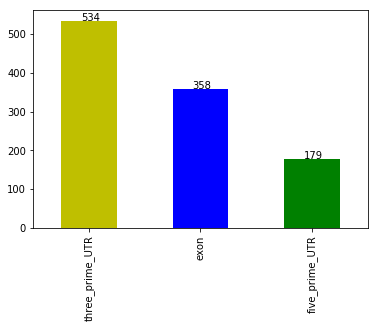

In [188]:
ax = df_deg_comes_mites.annotation.value_counts().plot('bar',color=['y','b','g'])
x_offset = -0.07
y_offset = 0.15

for p in ax.patches:
    b = p.get_bbox()
    val = int(b.y1)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
ax

In [175]:
df_deg[df_deg.MITE.notnull()].annotation.value_counts()

three_prime_UTR    912
exon               444
five_prime_UTR     271
Name: annotation, dtype: int64

In [183]:
df_deg[(df_deg.has_target == 2) & (df_deg.DegradomeCategory == 0)][['Query','Transcript','SiteID','lib','annotation','MITE']]

,Query,Transcript,SiteID,lib,annotation,MITE
862,sun_all_Cluster_8835,TraesCS2D02G327200.1,TraesCS2D02G327200.1:2349,SRR1197125,three_prime_UTR,"MITE_75,MITE_325,MITE_502,MITE_502,DTT_Taes_At..."
2182,sun_all_Cluster_8835,TraesCS5D02G261800.1,TraesCS5D02G261800.1:1451,SRR1197125,three_prime_UTR,"MITE_75,MITE_75,MITE_281,MITE_419,MITE_419,MIT..."
4515,sun_all_Cluster_28681,TraesCS2D02G449600.1,TraesCS2D02G449600.1:2637,SRR1197126,exon,"MITE_148,MITE_677,MITE_677,MITE_798,DTT_Osat_P..."
9018,sun_all_Cluster_8835,TraesCS2B02G543000.1,TraesCS2B02G543000.1:1198,SRR1197127,three_prime_UTR,"MITE_75,MITE_75,MITE_164,MITE_164,MITE_239,DTT..."
14648,sun_all_Cluster_8835,TraesCS5B02G480100.1,TraesCS5B02G480100.1:1530,SRR1197128,three_prime_UTR,"MITE_502,MITE_778,MITE_778,MITE_811,MITE_811,D..."


In [176]:
df_mir.to_csv(path_mir_res, sep='\t', index=None)
path_mir_res

'/home/juan/Desktop/juan/bio/mirna_mite/data/res/all_results_targets.csv'

In [177]:
df_deg[(df_deg.Query.isin(mirs_mites)) & (df_deg.DegradomeCategory == 0) & (df_deg.annotation == 'exon')]

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,...,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,MITE,annotation,has_target
2816,TraesCS7B02G175300.2:1507,mrcv_all_Cluster_12767,TraesCS7B02G175300.2,1496,1516,1507,-37.0,-27.1,0.732432,5.5,...,"5-5,1512-1512[SIL];10-10,1507-1507[SIL]",(((((((((((.((((.((((&)))).)))).))))))))))),UACUCCCUCCGUUCCAAAUUA&UAAUAUGGAUUGGAGGGGGUA,0,0.163435,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,NaN,exon,0
3709,TraesCS1D02G420700.2:549,mrcv_all_Cluster_8534,TraesCS1D02G420700.2,538,558,549,-38.6,-25.3,0.655440,11.0,...,"1-3,558-556[UP5];9-9,550-550[SIL];21-21,538-53...",.(((((((((((.(((((...&...))))).))))))))))).,CCUGCCCCUCUUCGGUUCCAU&AUUGAACUAAGGAGGGGUGGA,0,0.278707,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,NaN,exon,0
4515,TraesCS2D02G449600.1:2637,sun_all_Cluster_28681,TraesCS2D02G449600.1,2626,2646,2637,-34.6,-25.0,0.722543,3.5,...,"4-4,2643-2643[SIL]",(((((((((((((((((.(((&))).))))))))))))))))),UGUCUUAGAUUUGUCUAAAUA&UAUCUGGACAAAUCUGAGACA,0,0.022134,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,"MITE_148,MITE_677,MITE_677,MITE_798,DTT_Osat_P...",exon,2
7543,TraesCS7D02G504600.2:1259,sun_all_Cluster_33132,TraesCS7D02G504600.2,1248,1268,1259,-36.9,-26.2,0.710027,8.5,...,"8-8,1261-1261[SIL];20-21,1249-1248[UP3]",..(((((((((((.(((((((&))))))).)))))))))))..,GGUUGUCCCGCGGGAGGAGGU&AUCUUCUAUCGUGGGACGAAG,0,0.027686,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,NaN,exon,0
10970,TraesCS5A02G148100.1:144,mrcv_all_Cluster_12767,TraesCS5A02G148100.1,133,154,144,-37.0,-24.7,0.667568,10.0,...,"5-5,150-149[AILt];10-10,144-144[SIL];20-21,134...",..(((((((((.((((..((((&))))-.)))).)))))))))..,GUUCCCCUCCAUUCCAAGGUUG&UAAU-AUGGAUUGGAGGGGGUA,0,0.656306,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197127,NaN,exon,0
12069,TraesCS6B02G142700.3:1077,mrcv_all_Cluster_12767,TraesCS6B02G142700.3,1066,1086,1077,-37.0,-24.1,0.651351,11.0,...,"1-1,1086-1086[UP5];7-7,1080-1080[SIL];19-21,10...",...(((((((((((.(((((.&.))))).)))))))))))...,AAACCCCUCUGGUCGGUGUUC&UAAUAUGGAUUGGAGGGGGUA,0,0.824972,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197127,NaN,exon,0
12533,TraesCS7A02G192500.1:1470,sun_all_Cluster_136100,TraesCS7A02G192500.1,1460,1479,1470,-35.8,-24.2,0.675978,7.0,...,"1-1,1479-1479[UP5];14-14,x-x[BULq]",(((((((-((((((((((((.&.)))))))))))).))))))),CCAUGAU-AGUGAGUCGGAGA&CUUCUGAUUUACUCGUCGUGG,0,0.286783,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197127,NaN,exon,0
14590,TraesCS5B02G218100.1:1564,sun_all_Cluster_8835,TraesCS5B02G218100.1,1553,1573,1564,-32.4,-26.1,0.805556,3.5,...,"20-21,1554-1553[UP3]",..(((((((((((((((((((&)))))))))))))))))))..,CAUCUUAUAUUUGUGAACGGA&UCUGUUCACAAAUGUAAGACG,0,0.003068,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197128,"DTT_Hvul_Oleus_AV833224-1,DTT_Null_Oleus_conse...",exon,0


In [189]:
#network

In [194]:
df_mir[df_mir.MITE.notnull()].head(3)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,23,24,seqname,position,start,end,MITE,mirbase,annotation,has_target
5,1B:161992200-161992280,sun_all_Cluster_8835,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,...,0,2,1B,161992200-161992280,161992200,161992280,"MITE_1712,MITE_233,MITE_1717,MITE_1157",hvu-miR6197,intron,2
9,1B:565664575-565664794,mrcv_all_Cluster_2513,220,223,1.750,1,0.991,+,CAUUUUCCUAUAGACUUGGUC,142,...,0,0,1B,565664575-565664794,565664575,565664794,"MITE_1151,MITE_1572,MITE_1565,MITE_606,MITE_68...",NaN,intron,1
11,1D:147896240-147896319,mrcv_mites_MITE_T_120271|chr2D|74975911|749759...,80,45,0.353,1,1.000,+,UAUAUUUUGGUACGGAGGGAU,22,...,0,0,1D,147896240-147896319,147896240,147896319,"MITE_1717,MITE_1717,MITE_233,MITE_233,MITE_18,...",NaN,intron,0


In [196]:
df_deg[df_deg.MITE.notnull()].head(3)

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,...,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,MITE,annotation,has_target
12,TraesCS1A02G015200.2:1664,mrcv_all_Cluster_21130,TraesCS1A02G015200.2,1650,1673,1664,-42.1,-27.9,0.662708,8.5,...,"x-x,1663-1663[BULt];14-14,1659-1657[AILt];21-2...",.((((((...(((.((((((((((&))))))))))-)))--.)))))).,UGUGGAGCUUGGGAUAGGCACAGG&CCUGUGCCUG-CCU--CUUCCAUU,4,1.000000,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,"MITE_148,MITE_577,MITE_634,MITE_674,MITE_677,M...",exon,0
21,TraesCS1A02G092900.1:256,sun_all_Cluster_19584,TraesCS1A02G092900.1,245,265,256,-33.3,-21.7,0.651652,10.0,...,"1-3,265-263[UP5];8-8,258-258[SIL];21-21,245-24...",.((((((((((((.((((...&...)))).)))))))))))).,CUCAUCCUGAGGAACAGACUG&UUUUUUGAUCCUUAGGAUGGC,3,0.999631,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,"MITE_148,MITE_577,MITE_798,MITE_1366",three_prime_UTR,0
27,TraesCS1A02G116200.1:3849,mrcv_all_Cluster_12767,TraesCS1A02G116200.1,3838,3858,3849,-37.0,-25.9,0.700000,12.5,...,"1-5,3858-3854[UP5];10-10,3849-3849[SIL]",(((((((((((.((((.....&.....)))).))))))))))),UACUCCCUCCGUUCCAAAAUA&UAAUAUGGAUUGGAGGGGGUA,4,1.000000,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,"MITE_803,MITE_803MITE_554",five_prime_UTR,0
